<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>RISE2.0 Business and Data Analytics</h1>
            <h2>IU 3.4.3 Data Preparation </h2>
        </th>
    </tr>
</table>

# Learning Objectives
#### After completing this lesson, you should be able to:

1. LO1 : Understand Data Preparation
2. LO2 : Understand Data Pre-processing steps for Machine Learning
3. LO3 : Apply Data Pre-processing on dataset

# Table of Contents <a id='tc'></a>

1. [Data Preparation](#p1)
2. [Data Pre-processing for ML](#p2)
3. [[Optional] Hands-On Practice Exercise](#p3)


# 1. Data Preparation <a id='p1' />

## 1.1 What is data preparation and why is it important? 
__What__: Data preparation is followed by Model building <br>
__Why__: The better the data preparation is, the more reliable is the output of model

Data preparation, if done properly, helps us avoid stirring the pile again and again and thus saves us a lot of time.

## 1.2 Basic overview on the different steps in data preparation

Below is the basic overview on the different steps which are followed in data development in a sequential order:

1. __Understanding basic information regarding data__: It includes checking number of columns and rows, their data types, basic statistics like mean, median, mode, variance etc., identifying dependent and independent features etc.


2. __Basic data manipulation__: It includes changing data types of columns, modifying columns names and deleting columns which are irrelevant to the problem based on business sense etc.


3. __Missing value treatment__: It is important that we do the missing value treatment as we can't input features into the model which have missing values. We can either remove features which have high percentage of missing values or we can replace those missing values with some other value if the percentage of missing values is less.


4. __Outlier treatment__: Outliers are points that are distant from remaining observations. As a result, they can potentially skew or bias any analysis performed on the dataset. It is therefore very important to detect and adequately deal with outliers.


5. __Univariate, Bivariate analysis and Multivariate analysis__: This analysis is extremely useful because it can help measure cause and effect among variables and draw conclusions among those variables.


6. __Variable transformation__: Variable transformation means creating new variables by taking log, square, cube etc. of the existing variables. This helps us take into account the non-linear relationship between dependent variable and independent variable.


7. __Dummy encoding of categorical variables__: Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. This means that categorical variables must be converted to a numerical form and this conversion is known as dummy encoding.


8. __Feature Selection__: Feature selection, also known as variable selection, is the process of selecting a subset of relevant features for use in model construction. Logic is that we want to select only those features in your data that are most useful or most relevant to the problem one is working on.


9. __Splitting the data set into train, test and cross validation data sets__: Model learns from the training data, model output are then checked on the cross validation data set to avoid overfitting (to be covered later) and then model is tested on the test data set to see how it is performing on an unseen data set.


10. __Scaling the features__: It means normalizing all the input features so that they are on the same scale. A dataset might contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem. If feature scaling is not done then features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes which creates bias in the model.

# 2. Data Pre-processing for ML<a id='p2' />

## 2.1 Understanding the Problem 

__Problem statement__: Use the New York energy data to build a model that can predict the Energy Star Score of a building and interpret the results to find the factors which influence the score.

1. Data is publicly available [here](http://www.nyc.gov/html/gbee/html/plan/ll84_scores.shtml)
2. Data dictionary [here](http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf)

A 1-to-100 percentile ranking based on self-reported energy usage for the reporting year. The [Energy Star score](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what) is a relative measure used for comparing the energy efficiency of buildings.

Now that we know about the problem and also have a basic understanding about the steps in the data development, let's try to understand each of these steps in detail along with the code.

## 2.2 Import library in Notebook

First we need to import all the libraries at once that we are going to use in this exercise.

In [2]:
import pandas as pd
import numpy as np
# from scipy import stats

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#taking care of warnings
import warnings
warnings.filterwarnings("ignore")

#for chi square test
# from scipy.stats import chi2_contingency
# from scipy.stats import chi2

#for ANOVA test
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

#for PCA
# from sklearn.decomposition import PCA

## 2.3 Setting Parameters for notebook 


There are certain parameters which need to be set to a certain value.

In [5]:
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Inline graphs
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Font size for seaborn
sns.set(font_scale = 2)

## 2.4 Load data in Notebook 

Load the data as pandas dataframe ([pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html))

In [6]:
data = pd.read_csv("data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

## 2.5 View the data 

In [7]:
#view only a subset of data using head function
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

## 2.6 Basic Information about data 

We can use __info()__ to understand data types across Pandas dataframe.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

<mark>__Observation:__<mark>
* <mark>There are a number of columns with numbers that have been recorded as object datatypes<mark>
* <mark>These will have to be converted to float datatype before we can do any numerical analysis<mark>

## 2.7 Descriptive statistics

Generate descriptive statistics that summarize the central tendency, dispersion and shape of the various features present in the data.

[describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### 2.7.1 Generate descriptive statistics for continuous variables

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,11746.0,7.185760e+03,4.323860e+03,1.000000,3.428250e+03,6.986500e+03,1.105450e+04,1.499300e+04
Property Id,11746.0,3.642958e+06,1.049070e+06,7365.000000,2.747222e+06,3.236404e+06,4.409092e+06,5.991312e+06
DOF Gross Floor Area,11628.0,1.732695e+05,3.367055e+05,50028.000000,6.524000e+04,9.313850e+04,1.596140e+05,1.354011e+07
Year Built,11746.0,1.948738e+03,3.057639e+01,1600.000000,1.927000e+03,1.941000e+03,1.966000e+03,2.019000e+03
Number of Buildings - Self-reported,11746.0,1.289971e+00,4.017484e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.610000e+02
Occupancy,11746.0,9.876256e+01,7.501603e+00,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Property GFA - Self-Reported (ft²),11746.0,1.673739e+05,3.189238e+05,0.000000,6.699400e+04,9.408000e+04,1.584140e+05,1.421712e+07
Latitude,9483.0,4.075438e+01,8.012028e-02,40.516065,4.070723e+01,4.075913e+01,4.081762e+01,4.091287e+01
Longitude,9483.0,-7.395706e+01,4.633735e-02,-74.243582,-7.398466e+01,-7.396281e+01,-7.393244e+01,-7.371554e+01
Community Board,9483.0,7.140673e+00,3.954129e+00,1.000000,4.000000e+00,7.000000e+00,9.000000e+00,5.600000e+01


### 2.7.2 Generate descriptive statistics for categorical variables

In [15]:
data.describe(include = "O").T

,count,unique,top,freq
Property Name,11746,11740,Clinton West Condominium,2
Parent Property Id,11746,102,Not Applicable: Standalone Property,11324
Parent Property Name,11746,103,Not Applicable: Standalone Property,11324
BBL - 10 digits,11735,11580,1019730001,26
"NYC Borough, Block and Lot (BBL) self-reported",11746,11582,1019730001,26
NYC Building Identification Number (BIN),11746,11508,Not Available,162
Address 1 (self-reported),11746,11645,410 West 118th Street,12
Address 2,11746,177,Not Available,11539
Postal Code,11746,286,10022,269
Street Number,11622,4198,1,66


# 2.8 Data Cleaning

### 2.8.1 Replace with nan

It is important to replace values which doesn't give any information with nan so that it becomes easy to do the missing value treatment using in-built functions of python.

Replace "Not available" with nan<br>
Hint: numpy not a number is the ideal replacement for any 'not available' values
* [pandas - replace](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html)
* [numpy - nan](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html)

In [16]:
data['ENERGY STAR Score'].describe()

count             11746
unique              101
top       Not Available
freq               2104
Name: ENERGY STAR Score, dtype: object

In [17]:
data = data.replace({"Not Available": np.nan})

In [18]:
data['ENERGY STAR Score'].describe()

count     9642
unique     100
top        100
freq       649
Name: ENERGY STAR Score, dtype: object

### 2.8.2 Convert data to correct data types

It is a good practice to correct data types before we pass these features to the model as interpretation of numerical and categorical features is different with respect to model.

**Convert object data types to numbers**

[documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [20]:
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] =  data[col].astype(float)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,11746.0,7.185760e+03,4.323860e+03,1.000000e+00,3.428250e+03,6.986500e+03,1.105450e+04,1.499300e+04
Property Id,11746.0,3.642958e+06,1.049070e+06,7.365000e+03,2.747222e+06,3.236404e+06,4.409092e+06,5.991312e+06
DOF Gross Floor Area,11628.0,1.732695e+05,3.367055e+05,5.002800e+04,6.524000e+04,9.313850e+04,1.596140e+05,1.354011e+07
Largest Property Use Type - Gross Floor Area (ft²),11744.0,1.605524e+05,3.095746e+05,5.400000e+01,6.520100e+04,9.132400e+04,1.532550e+05,1.421712e+07
2nd Largest Property Use - Gross Floor Area (ft²),3741.0,2.277868e+04,5.509444e+04,0.000000e+00,4.000000e+03,8.654000e+03,2.000000e+04,9.624280e+05
3rd Largest Property Use Type - Gross Floor Area (ft²),1484.0,1.201683e+04,2.795976e+04,0.000000e+00,1.720750e+03,5.000000e+03,1.200000e+04,5.916400e+05
Year Built,11746.0,1.948738e+03,3.057639e+01,1.600000e+03,1.927000e+03,1.941000e+03,1.966000e+03,2.019000e+03
Number of Buildings - Self-reported,11746.0,1.289971e+00,4.017484e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.610000e+02
Occupancy,11746.0,9.876256e+01,7.501603e+00,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
ENERGY STAR Score,9642.0,5.985459e+01,2.999359e+01,1.000000e+00,3.700000e+01,6.500000e+01,8.500000e+01,1.000000e+02


<mark>__Observations:__<mark>

<mark>Zeros in the min block indicates missing values. We can either remove features which have high percentage of missing values or we can replace those missing values with some other value if the percentage of missing values is less.
<mark>

### 2.8.3 Change target variable name 

It is a good practice to shorten the target variable name as it will be used frequently in the later part of the code.

**Change the name of the target variable to "score"**

[df.rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [24]:
data = data.rename(columns={'ENERGY STAR Score': 'score'})

In [25]:
data.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalize

## 2.9 Data Quality 

### 2.9.1 Missing value treatment 

It is important that we calculate percentage of missing values in each of the input features and then remove feature with high percentage of missing values as it is difficult to infer anything about the relationship between input feature and output feature with limited data and the output might get biased.

__Why is it important?__
 
* Missing data in a data set can reduce the power of a model or can lead to a biased model because we have not analysed the behaviour and relationship with other variables correctly. It can lead to wrong prediction or classification
* Some of the machine learning algorithms don't accept features with missing values

Now we will try to understand how missing values treatment is done in detail below.

**Calculate percentage of missing value for each column**

[isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)

In [26]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [27]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


<mark>__Observations:__<mark>

<mark>Although we want to be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use.<mark>

### 2.9.1.1 Drop columns with more than 50% missing values

[df.drop()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [28]:
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [29]:
data = data.drop(columns=list(missing_columns))

<mark>__NOTE__: There are still certain columns which have some percentage of missing values less than 50%. It will be taken care of in the code below.<mark>

### 2.9.1.2 Imputing missing Values

__What is imputing missing values?__

* Imputation is a method to fill in the missing values with estimated ones
* The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values
* Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable


__How it is done?__

We have already removed features with more than 50% missing values in the first part, here we will focus on filling in these missing values<br>
In the code below, we create a Scikit-learn Imputer object to fill in missing values with the median of the column. Notice that we train the imputer (using the Imputer.fit method) on the training data but not the testing data. We then transform (using Imputer.transform) both the training data and testing data. This means that the missing values in the testing set are filled in with the median value of the corresponding columns in the training set. This is one way to avoid the problem known as data leakage where information from the testing data set "leaks" into the training process.

#### Using imputer function

In [30]:
missing_value_imputation_data = data[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)']]

missing_value_imputation_data.isnull().sum()

score                                       2104
Site EUI (kBtu/ft²)                          163
Weather Normalized Source EUI (kBtu/ft²)    1465
dtype: int64

In [31]:
missing_values_table(missing_value_imputation_data)

Your selected dataframe has 3 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
score,2104,17.9
Weather Normalized Source EUI (kBtu/ft²),1465,12.5
Site EUI (kBtu/ft²),163,1.4


In [32]:
#### Using Imputer from sklearn
imputer = Imputer(strategy='median')
imputer.fit(missing_value_imputation_data)

SimpleImputer(strategy='median')

In [33]:
###### Imputer.transform will return numpy 
X = imputer.transform(missing_value_imputation_data)
missing_values_table(pd.DataFrame(X))

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Using fillna function in pandas

In [34]:
missing_value_imputation_data = data[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)']]

missing_value_imputation_data['Weather Normalized Source EUI (kBtu/ft²)'].fillna(missing_value_imputation_data['Weather Normalized Source EUI (kBtu/ft²)'].mean(), inplace=True)

missing_value_imputation_data.isnull().sum()

score                                       2104
Site EUI (kBtu/ft²)                          163
Weather Normalized Source EUI (kBtu/ft²)       0
dtype: int64

In [35]:
#create a copy of the data
data_copy = data.copy()

### 2.9.2 Outlier treatment 

__What is outlier treatment and why it is an important step?__

Outliers are points that are distant from remaining observations. As a result, they can potentially skew or bias any analysis performed on the dataset. It is therefore very important to detect and adequately deal with outliers.

__How to remove Outliers?__

Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treating them as a separate group, imputing values etc. 

Here, we will discuss the common techniques used to deal with outliers: 
* __Deleting observations__ : We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.
* __Capping values__: Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation. __As a rule of thumb Capping of higher values is done (uptil 99th percentile) and Flooring of small values is done (uptil 1st percentile) to avoid biasing in model__


### 2.9.2.1 Remove outliers (IQR)

Hint: extract quartile from describe()

In [42]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

In [43]:
# Interquartile range
iqr = third_quartile - first_quartile

In [44]:
# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]


Text(0.5, 1.0, 'Site EUI distribution')

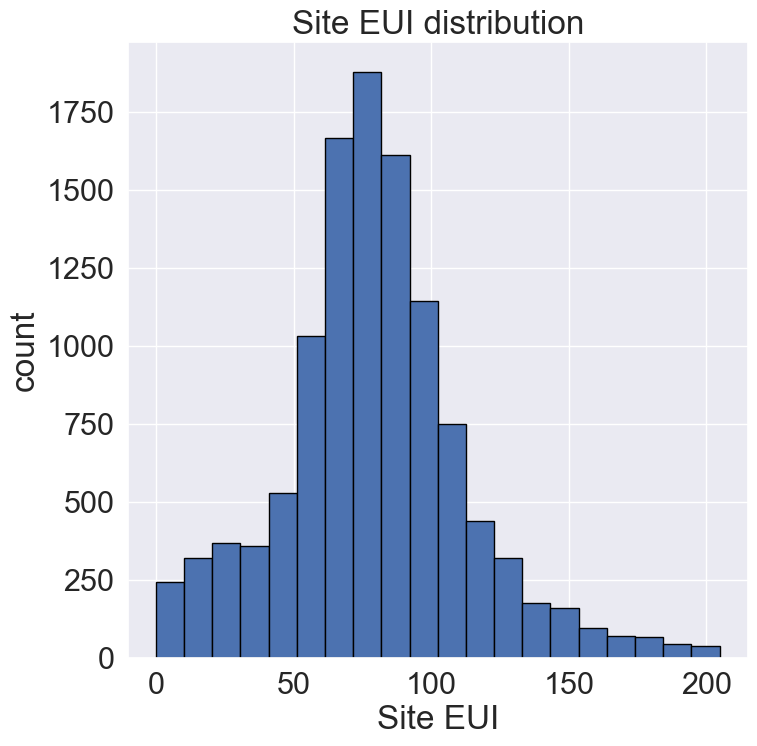

In [39]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(),
        bins=20,
        edgecolor='black');
plt.xlabel('Site EUI');
plt.ylabel('count');
plt.title('Site EUI distribution')

## Brain teaser question 

<mark>__Should we do outlier treatment before data exploration?__<mark>

Think about what could happen if we don't do outlier treatment and then go ahead with data exploration?

Not so straightforward, is it?

Let's think about it this way. Suppose one of the independent feature contains outlier and we go ahead with data exploration without doing outlier treatment. 

Let's take an __example__- let's check the frequency distribution of Site EUI before doing outlier treatment.

Text(0.5, 1.0, 'Site EUI distribution')

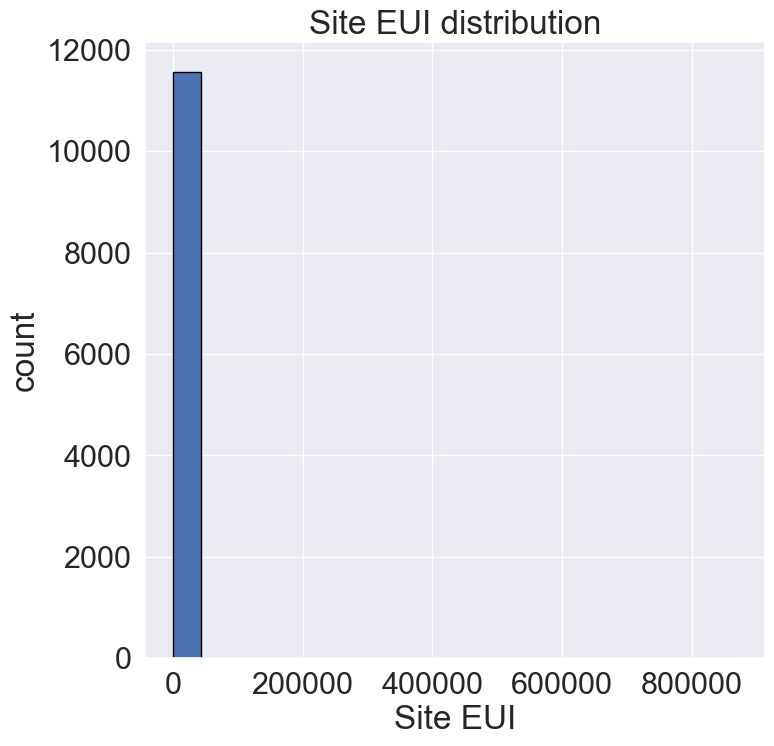

In [40]:
figsize(8, 8)
plt.hist(data_copy['Site EUI (kBtu/ft²)'].dropna(),
        bins=20,
        edgecolor='black');
plt.xlabel('Site EUI');
plt.ylabel('count');
plt.title('Site EUI distribution')

We have seen this graph before, haven't we?<br>
Refer to the outlier detection section and you will see a frequency distribution graph of Site EUI after outlier treatment. Now compare that graph with this.<br>

Do you see any difference?<br>
Are you able to draw conclusion about the distribution of values in Site EUI column?<br>

No, right? <br>
This is because of the presence of an outlier and that's why the x axis is stretched to accommodate that point.

## 2.10 Feature Engineering 

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.<br>
Feature engineering answers this question: what is the best representation of the sample data to learn a solution to your problem?<br>
Feature engineering encompasses a lot of concepts like feature selection, feature construction etc. Let's discuss two these concepts in detail.

### 2.10.1 Feature construction 

### Derived Features

Existing features in the data set can only give you so much accuracy. What else can we do to increase the model accuracy?
This is where feature construction becomes helpful.<br>

With tabular data, it often means a mixture of aggregating or combining features to create new features, and decomposing or splitting features to create new features.

With textual data, it often means devising document or context specific indicators relevant to the problem. With image data, it can often mean enormous amounts of time prescribing automatic filters to pick out relevant structures.

Some real case __examples__:

* Let's say you are building a cross sell model for an insurance client. You have a date in the data when a customer bought the first product from your company and he/she is still active. Using this information, you can derive a feature which will indicate the life span of the customer. Hypothesis would be higher the life span of the customer, higher the chances that he/she will go for another product
* On similar problem, we can count the number of products a customer has and create a derived feature using this idea. Hypothesis would be higher the number of products owned by a customer, higher the chances that he/she will go for another product.

### 2.10.2 Variable Transformation - Numeric

__Variable transformation in data modelling__ 

* Transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. In other words, transformation is a process that changes the distribution or relationship of a variable with others. 

__Why should we use Variable Transformation?__

* When we want to change the scale of a variable or standardize the values of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation does not change the shape of the variable distribution. 
* When we can transform complex non-linear relationships into linear relationships. Existence of a linear relationship between variables is easier to comprehend compared to a non-linear or curved relation. Transformation helps us to convert a non-linear relation into linear relation. Scatter plot can be used to find the relationship between two continuous variables. These transformations also improve the prediction. Log transformation is one of the commonly used transformation techniques used in these situations.

__What are the common methods of Variable Transformation?__

There are various methods used to transform variables. Some of them include:
* Square root
* Cube root
* Logarithmic
* Binning
* Reciprocal 
* and many others
* Logarithm: Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well.

__An example on when we use which type of transformation__

* __Log transformation__: The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

<div style="width: 80%; display: inline-block; text-align: center;">
        <img src="images/log_example.gif" height="800">
</div>

Picture above shows an example of how a log transformation can make patterns more visible. Both graphs plot the brain weight of animals as a function of their body weight. The raw weights are shown in the upper panel; the log-transformed weights are plotted in the lower panel.
It is hard to discern a pattern in the upper panel whereas the strong relationship is shown clearly in the right panel.

<mark>__Observation__<mark>

* <mark>Certain transformations can't be applied to negative values like log transformation, square root etc.<mark>
* <mark>Exponential transformation of a very large value might result in infinite value as an output.<mark>

To account for possible __non-linear relationships__, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score.

#### Take square root and natural log transformations of the features

[numpy.sqrt()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sqrt.html)
[numpy.log()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html)

In [45]:
numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

### 2.10.3 Dummy encoding - Categorical 

__What is dummy encoding and why do we do it?__

* Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. This means that categorical variable must be converted to a numerical form and this conversion is known as dummy encoding
* It is useful to take categorical variable as a predictor in statistical models. Categorical variable can take values 0 and 1

**Example:** Let’s take a variable ‘gender’. We can produce two variables, namely, “Var_Male” with values 1 (Male) and 0 (No male) and “Var_Female” with values 1 (Female) and 0 (No Female). We can also create dummy variables for more than two classes of a categorical variables with n or n-1 dummy variables in a similar way.

To try and capture any possible relationships between the borough or building type (remember these are categorical variables) and the score we will have to one-hot encode these columns.

[pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

**One-hot encoding for categorical variables**

Below code creates dummies of 2 categorical variables using get_dummies function in python.

In [48]:
categorical_subset = data[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset, drop_first = True)

categorical_subset.head()

,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,Largest Property Use Type_Mailing Center/Post Office,Largest Property Use Type_Manufacturing/Industrial Plant,Largest Property Use Type_Medical Office,Largest Property Use Type_Movie Theater,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<mark>__Observation__<mark>

* <mark>Borough variable have 5 distinct values. After creating dummies, 4 new continuous variables have been created as can be seen above.<mark>
* <mark>5th variable has been dropped randomly because 5th variable provides redundant information. If we know the values present inside any 4 columns created from borough column, then we can easily guess what is the value inside the 5th column.<mark>
* <mark>This is exactly what drop_first snippet inside pd.get_dummies do<mark>
* <mark>This is why we get n-1 variables when we convert a categorical variable with n distinct values to a numeric variable<mark>

**One-hot encoding for ordinal variables**

__What are ordinal variables?__

A ordinal variable, is one where the order matters but not the difference between values. For example, you might ask patients to express the amount of pain they are feeling on a scale of 1 to 10. A score of 7 means more pain that a score of 5, and that is more than a score of 3. But the difference between the 7 and the 5 may not be the same as that between 5 and 3. The values simply express an order.

<mark>__NOTE__<mark>

<mark>In order to create dummy on ordinal variable, we need to follow the exact same process which we followed for nominal categorical variables above.<mark>

### 2.10.4 Feature Selection 

__What is it?__

Feature Selection is the process where you automatically or manually select those features which contribute the most to your prediction variable or output in which you are interested in.

__Why is it important?__

Machine learning works on a simple rule – if you put garbage in, you will only get garbage to come out. By garbage here, I mean noise in data. Feature selection becomes even more important when the number of features are very large. You need not use every feature at your disposal for creating an algorithm. You can assist your algorithm by feeding in only those features that are really important.
* It enables the machine learning algorithm to train faster.
* It reduces the complexity of a model and makes it easier to interpret.
* It improves the accuracy of a model if the right subset is chosen.
* It reduces overfitting.

There are plenty of more methods for feature selection. Some popular methods include principal components analysis (PCA) which transforms the features into a reduced number of dimensions that preserve the greatest variance, or independent components analysis (ICA) which aims to find the independent sources in a set of features. However, while these methods are effective at reducing the number of features, they create new features that have no physical meaning and hence make interpreting a model nearly impossible.

### 2.10.5 Variable Reduction 

__What is variable reduction?__

Variable reduction is a crucial step for accelerating model building without losing the potential predictive power of the data. It is one of the ways to perform feature selection.

__Why is it important?__

It serves as a fundamental technique to identify those variables which are most efficient and effective for a given problem and features which are not able to explain the dependent variable are dropped.

__Common methods to perform Variable Reduction?__

1. __Missing Values__: Drop the variables - if we have too many missing values. It has already been explained in this notebook above.


2. __Low Variance__: Drop variables having low variance compared to others because these variables will not explain the variation in target variables.


3. __High Correlation__: Dimensions exhibiting higher correlation can lower down the performance of model. Moreover, it is not good to have multiple variables of similar information or variation also known as “Multicollinearity”. VIF (variance inflation factor) is used to detect multicollinearity. Variables having higher value ( VIF > 5 ) can be dropped. 


4. __Factor Analysis__: Let’s say some variables are highly correlated. These variables can be grouped by their correlations i.e. all variables in a particular group can be highly correlated among themselves but have low correlation with variables of other group(s). Here each group represents a single underlying construct or factor. These factors are small in number as compared to large number of dimensions. However, these factors are difficult to observe. There are basically two methods of performing factor analysis:

    * EFA (Exploratory Factor Analysis)
    * CFA (Confirmatory Factor Analysis)



5. __Principal Component Analysis (PCA)__: In this technique, variables are transformed into a new set of variables, which are linear combination of original variables. These new set of variables are known as principal components. They are obtained in such a way that first principal component accounts for most of the possible variation of original data after which each succeeding component has the highest possible variance.  
The second principal component must be orthogonal to the first principal component. In other words, it does its best to capture the variance in the data that is not captured by the first principal component. For two-dimensional dataset, there can be only two principal components. Below is a snapshot of the data and its first and second principal components.

### 2.10.5.1 Correlation

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.<br>
For __example__, height and weight are related; taller people tend to be heavier than shorter people. The relationship isn't perfect. People of the same height vary in weight, and you can easily think of two people you know where the shorter one is heavier than the taller one. Nonetheless, the average weight of people 5'5'' is less than the average weight of people 5'6'', and their average weight is less than that of people 5'7'', etc. 

Correlation can tell you just how much of the variation in peoples' weights is related to their heights.

#### Correlation between two continuous variables

__Pearson correlation method__: In order to quantify correlations between the features (variables) and the target, we can calculate the Pearson correlation coefficient. This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated.<br>
Since dependent variables in this problem is a continuous variable, we can check for correlation between all continuous independent variables and the dependent variable using Pearson correlation method.

__Find correlation between features and the target__

[df.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)

In [49]:
correlations_data = data.corr()['score'].sort_values()

print(correlations_data.head(15), '\n')

print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.725004
Weather Normalized Site EUI (kBtu/ft²)                       -0.715050
Weather Normalized Source EUI (kBtu/ft²)                     -0.648714
Source EUI (kBtu/ft²)                                        -0.643767
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358229
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.345605
Direct GHG Emissions (Metric Tons CO2e)                      -0.145514
Weather Normalized Site Natural Gas Use (therms)             -0.134071
Natural Gas Use (kBtu)                                       -0.132596
Year Built                                                   -0.121921
Total GHG Emissions (Metric Tons CO2e)                       -0.111406
Electricity Use - Grid Purchase (kBtu)                       -0.049812
Latitude                                                     -0.048575
Weather Normalized Site Electricity (kWh)                    -0.047389
Proper

<mark>__Observations:__ There are several strong negative correlations between the features and the target<mark>
* <mark>The most negative correlations with the score are the different categories of Energy Use Intensity (EUI), Site EUI (kBtu/ft²) and  Weather Normalized Site EUI (kBtu/ft²) (these vary slightly in how they are calculated).<mark>
* <mark>The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease.<mark>

We can also visually identify correlation between two continuous variables by drawing Pearson correlation matrix. 

In [50]:
data.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site

In [51]:
#selecting only a subset of continuous columns from the main data set so that it is easier to visualize the correlation
data_corr = data.loc[:, ['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)', 
                         'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Water Intensity (All Water Sources) (gal/ft²)'
                         , 'Community Board', 'Census Tract']]

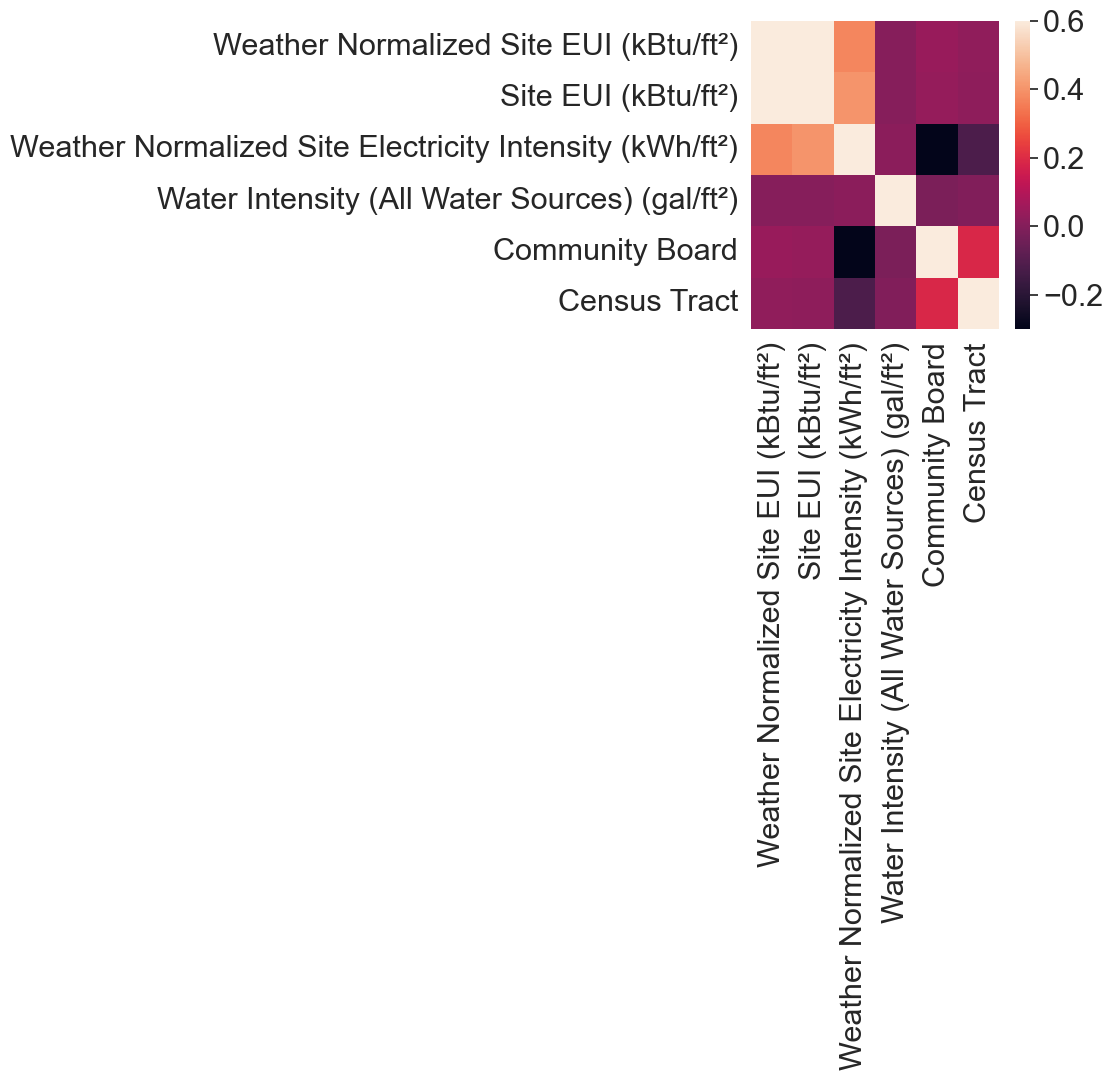

In [52]:
#correlation matrix
corrmat = data_corr.corr()
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corrmat, vmax=.6, square=False);

<mark>__Observation__<mark>

* <mark>Weather Normalized Site EUI (kBtu/ft²) & Site EUI (kBtu/ft²) seems much correlated.<mark>
* <mark>If two variables are highly correlated i.e. correlation score > 0.8 then it makes sense to keep only one variable out of the two as both the variables are providing almost the same information<mark>

## 2.11 Splitting DataFrame for Modelling

## Train and Test data set <a id='p6.1' />

__What is training data set?__

Training means creating or learning the model. That is, you show the model labelled examples and enable the model to gradually learn the relationships between features and label.

    - Features refer to the independent variables in the data set.
    - Label refer to the dependent variable in the data set. This is also known as target.

__What is test data set?__

A test data set is a labelled data set used to evaluate the model developed from a training set. Model can only be called as a good one if it is performing almost equally well on an unseen data set as it was performing on the training data set.

There can be two scenarios with respect to data:

* __Scenario 1__

Two separate labeled datasets for train and test.
-- Hurray! Life is easy and go ahead and apply EDA/data prep to both datasets. Build model using training data and evaluate using test.

* __Scenario 2__

One labelled dataset as input. Now we have to split that data into two parts - train and test.

Now let's see how we can split that data into two parts - train and test.

## Train - Test split <a id='p6.2' />

- Most common practice, 80% of data as train and 20% as test. Depending on the use case and number of data points you have to fix the optimal train and test size.
- In most cases, you will have the 80-20 split as __random__. In some scenarios you might have controlled sampling/stratified sampling for train - test split.
- scikit learn package has inbuilt <i>train_test_split</i> module to do random split.


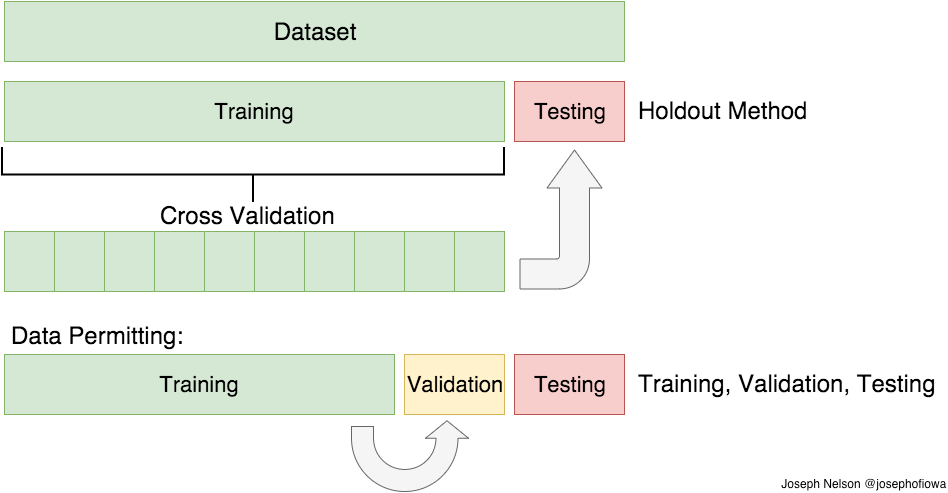

## 2.12 Feature scaling

__What is feature scaling?__

Feature scaling is a method used to standardize the range of independent variables or features of data.

__Why is it important?__

Scaling the features is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. __Decision Tree and Random Forest do not require feature scaling__, but other methods, such as support vector machines and k nearest neighbours, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms.

__How it is done?__

There are two ways to scale features:
* For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1. This is exactly what StandardScaler() does
* For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization. This is exactly what MinMaxScaler() does

### 2.12.1 Standard Scaler

* StandardScaler scales the features such that they have a mean of 0 and a standard deviation of 1.
* It transforms the data to have a standard normal distribution, centered around 0.
* This scaling is suitable for algorithms that assume that the features are normally distributed, such as many linear models, gradient descent-based algorithms, and SVM.
* It works well when the features have significantly different scales, and it helps to prevent the domination of certain features over others during the learning process.

In [53]:
ss_scaler = StandardScaler()

ss_scaler.fit(data.select_dtypes(np.number).dropna())

##### Below will return a numpy matrix which is scaled
X = ss_scaler.transform(data.select_dtypes(np.number).dropna())
X

array([[-1.82647306,  1.35078226, -0.4105318 , ...,  0.1260463 ,
        -0.83093335, -0.37516005],
       [-1.82450309, -0.50004437,  0.18107702, ...,  0.86205047,
        -0.58431303, -0.37283488],
       [-1.82168884, -0.632689  , -0.45062832, ...,  0.37138102,
        -0.64596811, -0.37014641],
       ...,
       [ 2.38419748,  1.30321264, -0.37953917, ..., -1.34596206,
         0.95706393, -0.34812998],
       [ 2.38447891,  1.30317615, -0.25778999, ..., -1.34596206,
         0.95706393, -0.38409741],
       [ 2.38504176,  1.30322348, -0.44783696, ..., -0.36462315,
         1.3269944 , -0.3726169 ]])

### 2.12.2 Min Max Scaler

* MinMaxScaler scales the features to a specified range, typically between 0 and 1.
* It linearly transforms the features such that the minimum value of each feature becomes 0, and the maximum value becomes 1.
* MinMax scaling is useful when the features have different ranges, and you want to bring them all into a common range.
* It is suitable for algorithms that use distances or similarities between data points, such as k-nearest neighbors and neural networks.
* MinMax scaling preserves the relative relationships between the data points.

In [54]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))

mm_scaler.fit(data.select_dtypes(np.number).dropna())

##### Below will return a numpy matrix which is scaled
X = mm_scaler.transform(data.select_dtypes(np.number).dropna())

X

array([[0.00000000e+00, 7.98381742e-01, 5.60651642e-03, ...,
        1.27272727e-01, 6.00000000e-02, 1.12958731e-03],
       [4.67758102e-04, 4.20334038e-01, 4.76802039e-02, ...,
        1.81818182e-01, 1.40000000e-01, 1.40979501e-03],
       [1.13598396e-03, 3.93240198e-01, 2.75495557e-03, ...,
        1.45454545e-01, 1.20000000e-01, 1.73378517e-03],
       ...,
       [9.99799532e-01, 7.88665226e-01, 7.81063242e-03, ...,
        1.81818182e-02, 6.40000000e-01, 4.38700187e-03],
       [9.99866355e-01, 7.88657773e-01, 1.64691183e-02, ...,
        1.81818182e-02, 6.40000000e-01, 5.25389445e-05],
       [1.00000000e+00, 7.88667442e-01, 2.95346997e-03, ...,
        9.09090909e-02, 7.60000000e-01, 1.43606448e-03]])

## Brain teaser question

<mark>__Should we do feature scaling before or after train test split?__<mark>

Think about it for a moment. Many machine learning practitioners still make mistake when it comes to this.

Don' forget the point that we want to test the model on an unseen data set. Feature normalization of the explanatory variables is a technique used to centre and normalise the data by subtracting the mean and dividing by the variance. If you take the mean and variance of the whole dataset you'll be introducing future information into the training explanatory variables (i.e. the mean and variance) which is wrong.

Therefore, __you should perform feature normalisation over the training data__. Then perform normalisation on testing instances as well, but this time using the mean and variance of training explanatory variables. In this way, we can test and evaluate whether our model can generalize well to new, unseen data points.

# 3. [Optional] Hands-On Practice Exercise <a id='p3' />

We will use the `titanic dataset` from seaborn library to work on this Hands-On Practice Exercise.

You may use ChatGPT to complete this exercise.

In [ ]:
# load the dataset
titanic = sns.load_dataset('titanic')
titanic.head(10)

**Task 1: Impute Missing values**

* 1.1 For the 'age' column, replace missing values with the median age of passengers.
* 1.2 For the 'embarked' column, replace missing values with the most frequent value.
* 1.3 Drop the 'deck' column as it has too many missing values.

In [ ]:
# Task 1
# 1.1
titanic['age'].fillna(titanic['age'].median(), inplace=True)

In [ ]:
# 1.2
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

In [ ]:
# 1.3 
titanic.drop(columns=['deck'], inplace=True)

**Task 2: Perform one hot encoding on the pclass column and embarked column**

In [ ]:
# Task 2
titanic = pd.get_dummies(titanic, columns=['pclass', 'embarked'], prefix=['pclass','embarked'])
titanic.head()

**Task 3: Split the data into features and target; then into training and testing**



In [ ]:
# Task 3:
# Split the data into features and target
X = titanic.drop(columns=['survived'])
y = titanic['survived']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task 4: Scale the 'age' and 'fare' columns using Standardization**


In [ ]:
# Task 4:
scaler = StandardScaler()
X_train[['age', 'fare']] = scaler.fit_transform(X_train[['age', 'fare']])
X_test[['age', 'fare']] = scaler.transform(X_test[['age', 'fare']])

In [ ]:
X_train

##### The End
[Back to Content](#tc)

Copyright © 2023 by Boston Consulting Group. All rights reserved.